* using Fashion MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch import nn

from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
#dataset을 못 불러오면 실행
!pip install --upgrade torch torchvision

In [3]:
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
)

In [4]:
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = False)

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'device = {device}')

device = cpu


/home/qkrwnstj/anaconda3/envs/pytorch/lib/python3.8/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [6]:
print(training_data, '\n---------------------------------------------------\n', test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() 
---------------------------------------------------
 Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [7]:
training_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


label = 9


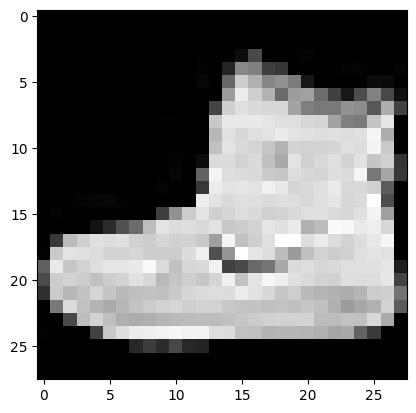

In [12]:
img, label = training_data[0]
plt.imshow(img.squeeze(), cmap='gray')
print(f'label = {label}')

In [13]:
labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankel Boot",
}

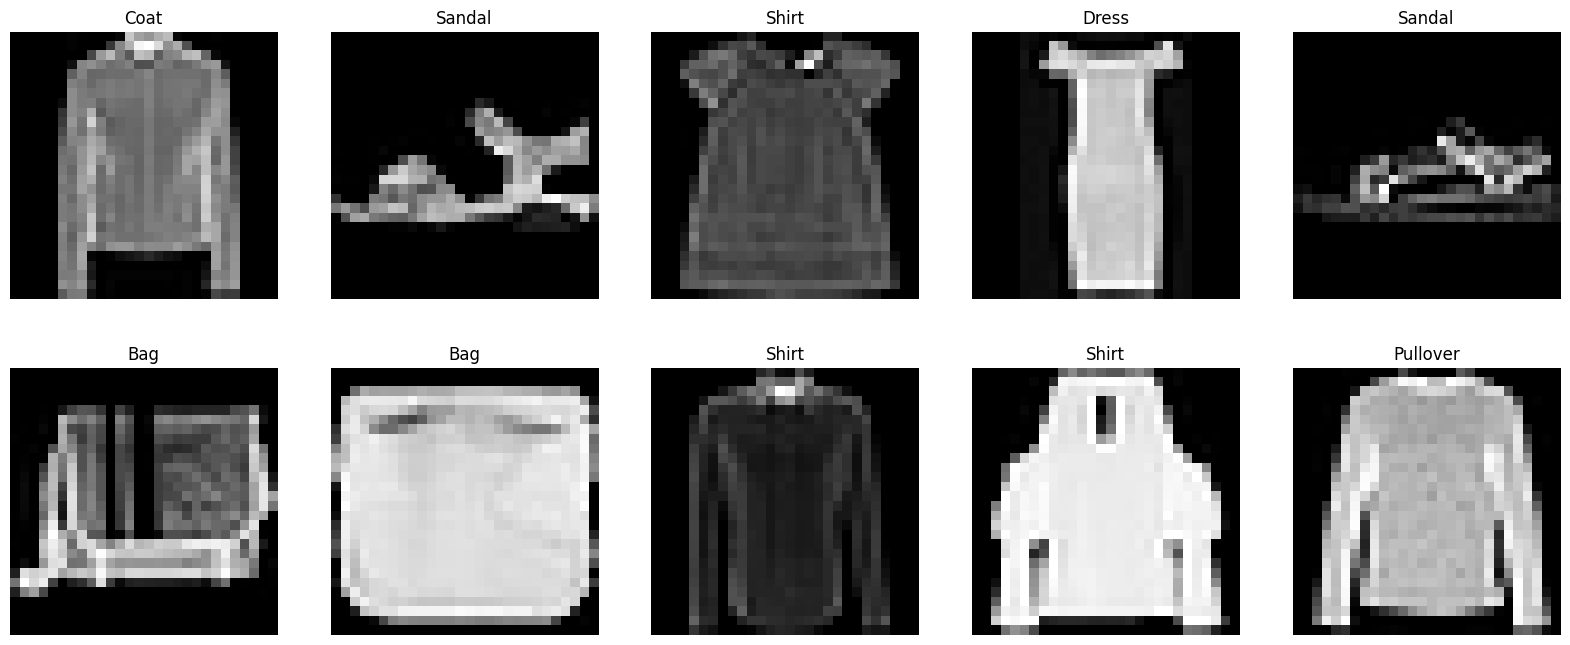

In [18]:
figure = plt.figure(figsize = (20,8))
cols, rows = 5, 2

for i in range(1, cols*rows +1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [21]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128,10),
        )
        
    def forward(self,x):
        x = self.flatten(x)
        output = self.classifier(x)
        return output

In [22]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [24]:
#model test
X = torch.rand(1,28,28, device = device)
output = model(X)
print(f'model output result : {output}\n')
pred_probab = nn.Softmax(dim=1)(output)
print(f'Softmax 결과 : {pred_probab}\n')
y_pred = pred_probab.argmax()
print(y_pred)

model output result : tensor([[ 0.1488, -0.1952,  0.1966,  0.0415, -0.0468, -0.3505, -0.0666,  0.1419,
          0.0684,  0.0353]], grad_fn=<AddmmBackward0>)

Softmax 결과 : tensor([[0.1149, 0.0815, 0.1206, 0.1032, 0.0945, 0.0698, 0.0927, 0.1141, 0.1061,
         0.1026]], grad_fn=<SoftmaxBackward0>)

tensor(2)


In [25]:
loss = nn.CrossEntropyLoss()

lr = 1e-3 # 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [27]:
def train_loop(train_loader, model, loss_fn, optimizer):
    size = len(train_loader.dataset)
    
    for batch, (X,y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 ==0:
            loss, current = loss.item(), batch * len(X)
            print(f'loss : {loss:>7f} [{current:>5d}]/{size:5d}')

In [30]:
def test_loop(test_loader, model, loss_fn):
    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred,y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy : {(100*correct):>0.1f}%, Avg Loss : {test_loss:8f}\n")

In [31]:
epochs = 10

for i in range(epochs):
    print(f'Epoch {i+1} \n--------------------------------------------------')
    train_loop(train_dataloader, model, loss, optimizer)
    test_loop(test_dataloader, model, loss)
print("Done!")

Epoch 1 
--------------------------------------------------
loss : 2.260388 [    0]/60000
loss : 0.707916 [ 6400]/60000
loss : 0.549058 [12800]/60000
loss : 0.646590 [19200]/60000
loss : 0.476270 [25600]/60000
loss : 0.515853 [32000]/60000
loss : 0.658283 [38400]/60000
loss : 0.529669 [44800]/60000
loss : 0.632768 [51200]/60000
loss : 0.419371 [57600]/60000
Test Error: 
 Accuracy : 82.5%, Avg Loss : 0.490520

Epoch 2 
--------------------------------------------------
loss : 0.590715 [    0]/60000
loss : 0.558388 [ 6400]/60000
loss : 0.503984 [12800]/60000
loss : 0.299643 [19200]/60000
loss : 0.564143 [25600]/60000
loss : 0.457132 [32000]/60000
loss : 0.294648 [38400]/60000
loss : 0.519166 [44800]/60000
loss : 0.378485 [51200]/60000
loss : 0.445497 [57600]/60000
Test Error: 
 Accuracy : 85.1%, Avg Loss : 0.423581

Epoch 3 
--------------------------------------------------
loss : 0.366191 [    0]/60000
loss : 0.301237 [ 6400]/60000
loss : 0.670771 [12800]/60000
loss : 0.468943 [19200]/

# Model save & load

# parameter만 저장 (weight값만 저장)

In [32]:
torch.save(model.state_dict(), 'model_weights.pth')

In [33]:
model2 = NeuralNetwork().to(device)
print(model2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [35]:
model2.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

In [36]:
model2.eval()
test_loop(test_dataloader, model2, loss)

Test Error: 
 Accuracy : 88.0%, Avg Loss : 0.336402



# Model 전체를 저장하고 불러오기

In [37]:
torch.save(model, 'model.pth')

In [38]:
model3 = torch.load('model.pth')

In [39]:
model3.eval()
test_loop(test_dataloader, model3, loss)

Test Error: 
 Accuracy : 88.0%, Avg Loss : 0.336402

